In [227]:
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [275]:
class Person(object):
    def __init__(self):
        self.status = "Susceptible"
        self.days_sick = 0
        self.sickness_rate = 10
        self.interacted_with = []
        self.identity = 0
        self.immunocompromised = False
        self.over_60 = False
        self.total_days_sick = 5
        
    
    def set_sickness_rate(self, new_rate):
        self.sickness_rate = new_rate
    
    def infect(self, number_of_days_sick):
        self.status = "Infected"
        self.days_sick = number_of_days_sick
    
    def recover(self):
        self.status = "Recovered"
        self.days_sick = 0
    
    def update(self):
        if (self.status == "Susceptible"):
            self.roll_for_infection()
            
        elif (self.status == "Infected"):            
            self.days_sick = self.days_sick - 1
            if (self.days_sick <= 0):
                self.recover()
                
    def update_days_sick(self):
        if(self.status == "Infected"):
            self.days_sick = self.days_sick - 1
            if(self.days_sick <= 0):
                self.recover()
            

            
    def roll_for_infection(self):
        self.total_days_sick = 5
        is_sick = (random.randint(0,101) < self.sickness_rate)
        if (is_sick):
            if(self.immunocompromised):
                self.total_days_sick = self.total_days_sick * 4
            if(self.over_60):
                self.total_days_sick = self.total_days_sick * 3
            self.infect(self.total_days_sick)  
            
    def interact(self, other):
        self.interacted_with.append(other)
        
    def identify_yourself(self, num):
        self.identity = num

In [276]:
# Joe = Person()
# Jane = Person()
# Jane.set_sickness_rate(20) #jane has a different sickness rate, joe has the default

# day = 0

# while (Joe.status != "Recovered" or Jane.status != "Recovered"):
#     day = day + 1        
#     Joe.update()
#     if (Joe.status == "Infected" or Jane.status == "Infected"):
#         Jane.update()
        
        
#     print("Joe is " + Joe.status + " day:" + str(day))
#     print("Jane is " + Jane.status + " day:" + str(day))
    
#     #My conditions didn't happen, let's rerun
#     #if Joe is recovered and Jane is still susceptable, the condtions for our program weren't met
#     #run it again!
    
#     if (Joe.status == "Recovered" and Jane.status == "Susceptible"):
#         Joe.status = "Susceptible"
#         day = 1
#         print()
#         print ("------- reset -------")

In [277]:
my_population = []
they_are_sick = []

for i in range(0,100):
    generic_dude = Person()
    generic_dude.identify_yourself(i)
    my_population.append(generic_dude)

person_num = 0
    
for person in my_population:
    # while len(person.interacted_with) < 10:
    #     interact_with = random.randint(0,99)
    #     while(person_num in my_population[interact_with].interacted_with or person_num == interact_with or len(my_population[interact_with].interacted_with) > 9):
    #         interact_with = random.randint(0,99)
    #     person.interact(interact_with)
    #     my_population[interact_with].interact(person_num)
    # print("Person",person_num,"interacted with",person.interacted_with)
    
    while len(person.interacted_with) < 10:
        interact_with = random.randint(0,99)
        while(person_num in my_population[interact_with].interacted_with or person_num == interact_with):
             interact_with = random.randint(0,99)
        person.interact(interact_with)
    #print("Person",person_num,"interacted with",person.interacted_with)
    person_num = person_num + 1
    
infected_count = 0
initial_infected = []
infected_day_1 = []
total_infected = []

for i in range(0,10):
    you_are_sick = random.randint(0,99)
    my_population[you_are_sick].infect(5)
    for person in my_population[you_are_sick].interacted_with:
        my_population[person].update()
    initial_infected.append(you_are_sick)

for person in my_population:
    if(person.status == "Infected"):
        infected_count = infected_count + 1
        total_infected.append(person.identity)
    if(person.status == "Infected" and initial_infected.count(person.identity) == 0):
        infected_day_1.append(person.identity)

print("Number of people infected:",infected_count)
print("All infected:",total_infected)
print("First 10 infected:",initial_infected)
print("Infected from first 10:",infected_day_1)


Number of people infected: 22
All infected: [1, 10, 12, 16, 20, 28, 34, 39, 40, 42, 44, 48, 57, 65, 66, 67, 71, 73, 77, 78, 93, 94]
First 10 infected: [12, 94, 71, 48, 34, 65, 66, 39, 73, 28]
Infected from first 10: [1, 10, 16, 20, 40, 42, 44, 57, 67, 77, 78, 93]


In [280]:
class Population:
    def __init__(self, number=100, interaction=10):
        self.People = []
        self.number = number
        self.interaction = interaction
        
        if(number < 100):
            self.number = 100
            
        if(interaction < 10):
            self.interaction = 10
            
        #build our population
        patient_Zero = Person()
        patient_Zero.infect(5)
        
        self.People.append(patient_Zero)
        
        for i in range(0, number):
            p = Person()
            j = random.randint(0,100)
            k = random.randint(0,100)
            if j < 3:
                p.immunocompromised = True
                p.set_sickness_rate(p.sickness_rate * 3)
            if k < 15:
                p.over_60 = True
                p.set_sickness_rate(p.sickness_rate * 2)
            self.People.append(p)
    
    def number_of_sick(self):
        sick_Count = 0
        for j in self.People:
            if(j.status == "Infected"):
                sick_Count = sick_Count + 1
        return sick_Count
    
    def number_of_recovered(self):
        recovered_Count = 0
        for j in self.People:
            if(j.status == "Recovered"):
                recovered_Count = recovered_Count + 1
                
        return recovered_Count
    
    def number_of_susceptible(self):
        susceptible_Count = 0
        for j in self.People:
            if(j.status == "Susceptible"):
                susceptible_Count = susceptible_Count + 1
                
        return susceptible_Count
    
    
    def update(self):
        
        might_Get_Sick = []
        
        for person in self.People:
            person.Interaction = []
            for i in range(0, self.interaction):
                r = random.randint(0, self.number)
                person.Interaction.append(r)
            
            if(person.status == "Infected"):
                person.update_days_sick()
                for m in person.Interaction:
                    if(self.People[m].status == "Susceptible"):
                        might_Get_Sick.append(self.People[m])
            
            if(person.status == "Susceptible"):
                for m in person.Interaction:
                    if(self.People[m].status == "Infected"):
                        might_Get_Sick.append(person)
                        
        for m in might_Get_Sick:
            m.roll_for_infection()
            
    def countAge(self):
        number_over_60 = 0
        for p in self.People:
            if(p.over_60 == True):
                number_over_60 = number_over_60 + 1
        return number_over_60
    
    def countImmunocompromised(self):
        number_immunocompromised = 0
        for p in self.People:
            if(p.immunocompromised == True):
                number_immunocompromised = number_immunocompromised + 1
        return number_immunocompromised
    
    def countDays(self):
        days_per_person = []
        for p in self.People:
            days_per_person.append(p.total_days_sick)
        return days_per_person
        
        

In [282]:
myCommunity = Population(10000, 10)
day = 0
my_plot = []
number_sick = myCommunity.number_of_sick()
while(number_sick > 0):
    number_sick = myCommunity.number_of_sick()
    number_recovered = myCommunity.number_of_recovered()
    my_plot.append([day,number_sick,number_recovered])
    print("day:",day,"Number of sick:",number_sick)
    day = day + 1
    myCommunity.update()
    
print("day:",day,"Number of sick:",myCommunity.number_of_sick())
print("Number recovered:",myCommunity.number_of_recovered())
print("Number susceptible:",myCommunity.number_of_susceptible())
print("Number of people over 60:",myCommunity.countAge())
print("Number of immunocompromised people:",myCommunity.countImmunocompromised())
print(my_plot)

day: 0 Number of sick: 1
day: 1 Number of sick: 4
day: 2 Number of sick: 16
day: 3 Number of sick: 58
day: 4 Number of sick: 202
day: 5 Number of sick: 689
day: 6 Number of sick: 2025
day: 7 Number of sick: 4918
day: 8 Number of sick: 8142
day: 9 Number of sick: 9528
day: 10 Number of sick: 9483
day: 11 Number of sick: 8543
day: 12 Number of sick: 6312
day: 13 Number of sick: 3498
day: 14 Number of sick: 2083
day: 15 Number of sick: 1795
day: 16 Number of sick: 1756
day: 17 Number of sick: 1746
day: 18 Number of sick: 1732
day: 19 Number of sick: 1698
day: 20 Number of sick: 1578
day: 21 Number of sick: 1310
day: 22 Number of sick: 756
day: 23 Number of sick: 358
day: 24 Number of sick: 282
day: 25 Number of sick: 254
day: 26 Number of sick: 191
day: 27 Number of sick: 88
day: 28 Number of sick: 52
day: 29 Number of sick: 49
day: 30 Number of sick: 49
day: 31 Number of sick: 49
day: 32 Number of sick: 49
day: 33 Number of sick: 49
day: 34 Number of sick: 49
day: 35 Number of sick: 49
d

In [243]:
df = pd.DataFrame(my_plot, columns=['day','number_sick','number_recovered'])
df

,day,number_sick,number_recovered
0,0,1,0
1,1,2,0
2,2,4,0
3,3,12,0
4,4,37,0
...,...,...,...
65,65,44,9957
66,66,39,9962
67,67,21,9980
68,68,3,9998


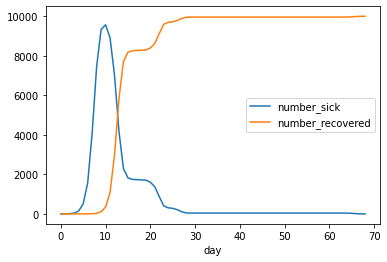

In [244]:
fig = plt.figure()
ax = plt.gca()
fig1 = df.plot(kind='line',x='day',y='number_sick',ax=ax).get_figure()
fig2 = df.plot(kind='line',x='day',y='number_recovered',ax=ax).get_figure()
plt.savefig('test.png',bbox_inches='tight')
plt.show()

In [222]:
df.to_csv('my_csv.csv')

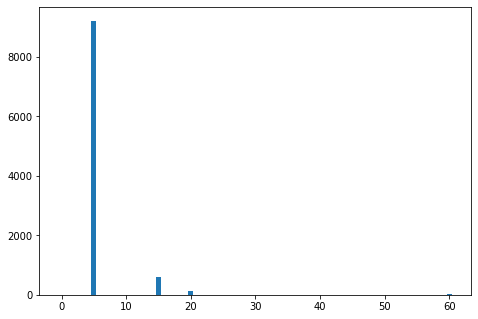

In [288]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
x = np.arange(61)
occurences = np.zeros(61)
for c in myCommunity.countDays():
    occurences[c] = occurences[c]+1
ax.bar(x,occurences)
plt.show()